#### INM702 Programming and Mathematics for Artificial Intelligence Coursework

**Importing Libraries** 

In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Importing required libraries: numpy for numerical operations, 
# matplotlib for plotting, TensorFlow's Keras for loading the MNIST dataset, 
# sklearn for confusion matrix, and seaborn for heatmap visualisation.

**Loading and Preprocessing the MNIST Dataset**

In [2]:
# Loading MNIST the dataset and preprocessing it (normalize pixel values, reshape, etc.)

# Defining function
def load_mnist_and_print():
    
    # Loading the MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Splitting the dataset into training and testing sets, normalising and reshaping the data
    X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
    X_test = X_test.reshape(X_test.shape[0], -1) / 255.0


    # Printing a small part of the dataset
    print("X_train sample shape:", X_train.shape)
    print("X_train sample:", X_train[0])
    print("y_train sample:", y_train[0])
    print("X_test sample shape:", X_test.shape)
    print("X_test sample:", X_test[0])
    print("y_test sample:", y_test[0])

# Calling the function
load_mnist_and_print()
    

X_train sample shape: (60000, 784)
X_train sample: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.  

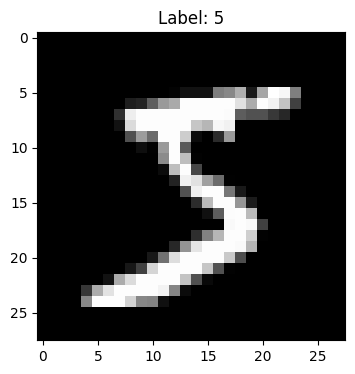

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # Repeating code only because the output shows an error X_train not defined
# Defining a function to plot a single image from the dataset:
def plot_image(data, index):
    plt.figure(figsize=(4, 4))  # Creating a figure with a size of 4x4 inches
    image_2d = data[index].reshape(28, 28)  # Reshaping the flattened data back into 2D
    plt.imshow(image_2d, cmap='gray')  # Displaying the image in grayscale
    plt.title(f"Label: {y_train[index]}")  # Adding a title with the label of the image
    plt.show()  # Displaying the plot

# Visualising the image at a specific index
plot_image(X_train, 0)  # This is index 0, we can see other images by changing the index

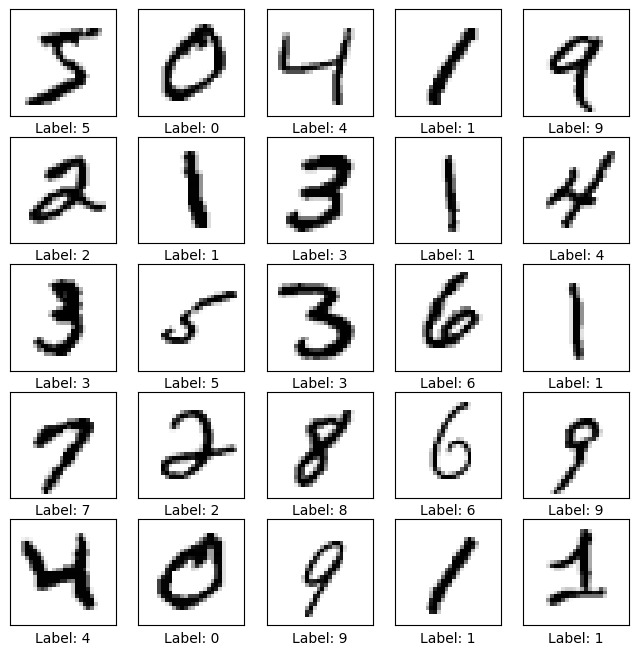

In [4]:
def plot_images(data, labels, start_index, num_images):
    plt.figure(figsize=(8,8))  # Creating a figure with a specified size (8x8 in this case)
    for i in range(num_images):
        plt.subplot(5, 5, i+1)  # Defining a 5x5 grid size and placing each image in sequence
        plt.xticks([])  # Removing the x-axis tick marks
        plt.yticks([])  # Removing the y-axis tick marks
        # Reshape the image data from (784,) to (28, 28)
        image_2d = data[start_index + i].reshape(28, 28)
        plt.imshow(image_2d, cmap=plt.cm.binary)  # Displaying the image at the given index in grayscale
        plt.xlabel(f"Label: {labels[start_index + i]}")  # Adding a label below the image showing its corresponding label from the dataset
    plt.show()  # Displaying the entire set of subplots

# Plotting the first 25 images from the dataset
plot_images(X_train, y_train, 0, 25)


In [5]:
# Function to load and preprocess the MNIST dataset (version 2):
def load_and_preprocess_mnist_dataset():
    # Loading the MNIST dataset from Keras
    (training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

    # Reshaping and normalising the images
    # Changing the shape from (60000, 28, 28) to (60000, 784) for training images
    # and from (10000, 28, 28) to (10000, 784) for testing images
    # Normalising the pixel values to be between 0 and 1
    training_images = training_images.reshape(60000, 784).astype('float32') / 255
    testing_images = testing_images.reshape(10000, 784).astype('float32') / 255

    return training_images, training_labels, testing_images, testing_labels

# Calling the function to load and preprocess the dataset
training_images, training_labels, testing_images, testing_labels = load_and_preprocess_mnist_dataset()

# Function to perform one-hot encoding of labels
def one_hot_encode_labels(labels, number_of_classes):
    # Using numpy's eye function to create a one-hot encoded matrix
    return np.eye(number_of_classes)[labels]

# Sigmoid activation function
def sigmoid_activation_function(input_array, calculating_derivative=False):
    # The sigmoid function transforms input values to be between 0 and 1
    if calculating_derivative:
        # If calculating derivative, return the derivative of the sigmoid function
        return input_array * (1 - input_array)
    return 1 / (1 + np.exp(-input_array))

# ReLU activation function
def relu_activation_function(input_array, calculating_derivative=False):
    # ReLU function sets all negative values in the input array to 0
    if calculating_derivative:
        # If calculating derivative, return 1 for all positive values and 0 for negative values
        return np.where(input_array > 0, 1, 0)
    return np.maximum(0, input_array)

# Softmax function
def softmax_function(input_array):
    # The softmax function converts an array of numbers into a probability distribution
    # Subtracting the max value for numerical stability
    exponential_input_array = np.exp(input_array - np.max(input_array, axis=1, keepdims=True))
    return exponential_input_array / np.sum(exponential_input_array, axis=1, keepdims=True)


In [6]:
# Standard Dropout Layer
class StandardDropoutLayer:
    def __init__(self, dropout_rate):
        # Initialising the dropout layer with a given dropout rate
        self.dropout_rate = dropout_rate
        self.mask = None

    def forward_pass(self, input_data, training_mode):
        # Applying dropout during the forward pass
        if training_mode:
            # Creating a mask with a binomial distribution
            self.mask = np.random.binomial(1, 1 - self.dropout_rate, size=input_data.shape)
            return input_data * self.mask
        return input_data

    def backward_pass(self, gradient_from_next_layer):
        # During the backward pass, scaling the gradient by the saved mask
        return gradient_from_next_layer * self.mask

# Dense Layer with L2 Regularization
class DenseLayer:
    def __init__(self, input_size, output_size, l2_regularization_lambda=0.01):
        # Initialising weights and biases for the dense layer
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.biases = np.zeros(output_size)
        self.l2_regularization_lambda = l2_regularization_lambda

    def forward_pass(self, input_data):
        # Saving the input for use in the backward pass
        self.input_data = input_data
        # Calculating the output of the dense layer
        self.output = np.dot(input_data, self.weights) + self.biases
        return self.output

    def backward_pass(self, gradient_from_next_layer):
        # Calculating the gradient of the loss with respect to weights and biases
        l2_regularization_term = self.l2_regularization_lambda * self.weights
        self.weights_gradient = np.dot(self.input_data.T, gradient_from_next_layer) + l2_regularization_term
        self.biases_gradient = np.sum(gradient_from_next_layer, axis=0)
        # Calculating the gradient to be passed to the previous layer
        gradient_to_previous_layer = np.dot(gradient_from_next_layer, self.weights.T)
        return gradient_to_previous_layer

# ReLU Activation Layer
class ReLUActivationLayer:
    def forward_pass(self, input_data):
        # Applying ReLU activation (max(0, x))
        self.input_data = input_data
        return np.maximum(0, input_data)

    def backward_pass(self, gradient_from_next_layer):
        # Gradient of ReLU is 1 for positive input and 0 for negative input
        gradient_to_previous_layer = gradient_from_next_layer * (self.input_data > 0)
        return gradient_to_previous_layer

# Sigmoid Activation Layer
class SigmoidActivationLayer:
    def forward_pass(self, input_data):
        # Applying sigmoid activation
        self.output = 1 / (1 + np.exp(-input_data))
        return self.output

    def backward_pass(self, gradient_from_next_layer):
        # Gradient of sigmoid function
        return gradient_from_next_layer * self.output * (1 - self.output)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, layers_configuration, dropout_rate=0.5, regularizer=None):
        # Initialising the neural network with a given configuration
        self.layers = []
        for layer_index, layer_configuration in enumerate(layers_configuration):
            # Adding dense layers with specified input and output sizes
            if 'dense' in layer_configuration:
                input_size, output_size = layer_configuration['dense']
                # Ensure the regularizer is a valid float
                l2_lambda = regularizer if regularizer is not None else 0.01
                self.layers.append(DenseLayer(input_size, output_size, l2_regularization_lambda=l2_lambda))
            # Adding activation layers (ReLU or Sigmoid) based on configuration
            elif 'activation' in layer_configuration:
                if layer_configuration['activation'] == 'relu':
                    self.layers.append(ReLUActivationLayer())
                elif layer_configuration['activation'] == 'sigmoid':
                    self.layers.append(SigmoidActivationLayer())
            # Adding dropout layers except for the last layer
            if layer_index < len(layers_configuration) - 1:
                self.layers.append(StandardDropoutLayer(dropout_rate))


    def forward_pass(self, input_data, training_mode=False):
        # Forward pass through all layers
        for layer in self.layers:
            if isinstance(layer, StandardDropoutLayer):
                input_data = layer.forward_pass(input_data, training_mode)
            else:
                input_data = layer.forward_pass(input_data)
        return input_data

    def backward_pass(self, gradient_from_loss):
        # Backward pass through all layers in reverse order
        for layer in reversed(self.layers):
            gradient_from_loss = layer.backward_pass(gradient_from_loss)


Epoch 1/10 - Training Loss: 2.3019, Training Accuracy: 0.1020, Validation Loss: 2.3023, Validation Accuracy: 0.1030
Epoch 2/10 - Training Loss: 2.3023, Training Accuracy: 0.1020, Validation Loss: 2.3027, Validation Accuracy: 0.1030
Epoch 3/10 - Training Loss: 2.3024, Training Accuracy: 0.1020, Validation Loss: 2.3028, Validation Accuracy: 0.1030
Epoch 4/10 - Training Loss: 2.3025, Training Accuracy: 0.1020, Validation Loss: 2.3029, Validation Accuracy: 0.1030
Epoch 5/10 - Training Loss: 2.3025, Training Accuracy: 0.1020, Validation Loss: 2.3029, Validation Accuracy: 0.1030
Epoch 6/10 - Training Loss: 2.3025, Training Accuracy: 0.1020, Validation Loss: 2.3029, Validation Accuracy: 0.1030
Epoch 7/10 - Training Loss: 2.3025, Training Accuracy: 0.1020, Validation Loss: 2.3029, Validation Accuracy: 0.1030
Epoch 8/10 - Training Loss: 2.3025, Training Accuracy: 0.1020, Validation Loss: 2.3029, Validation Accuracy: 0.1030
Epoch 9/10 - Training Loss: 2.3025, Training Accuracy: 0.1020, Validatio

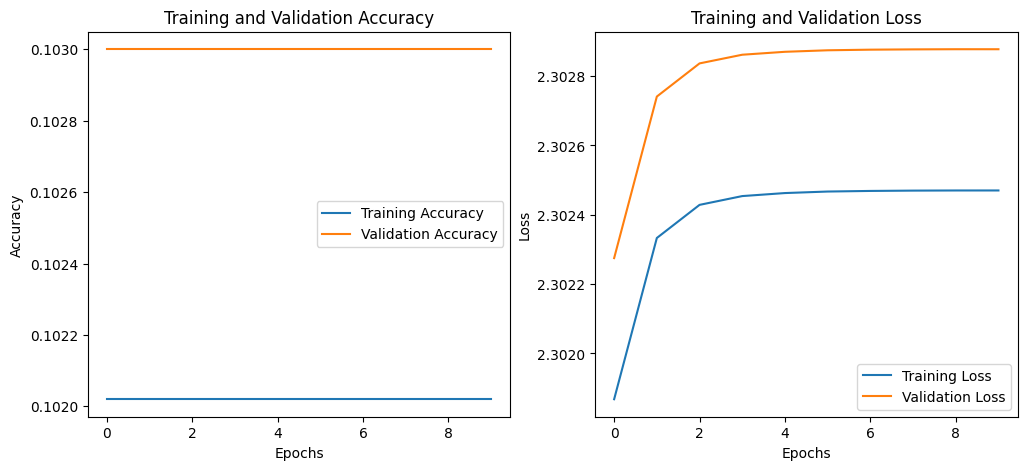

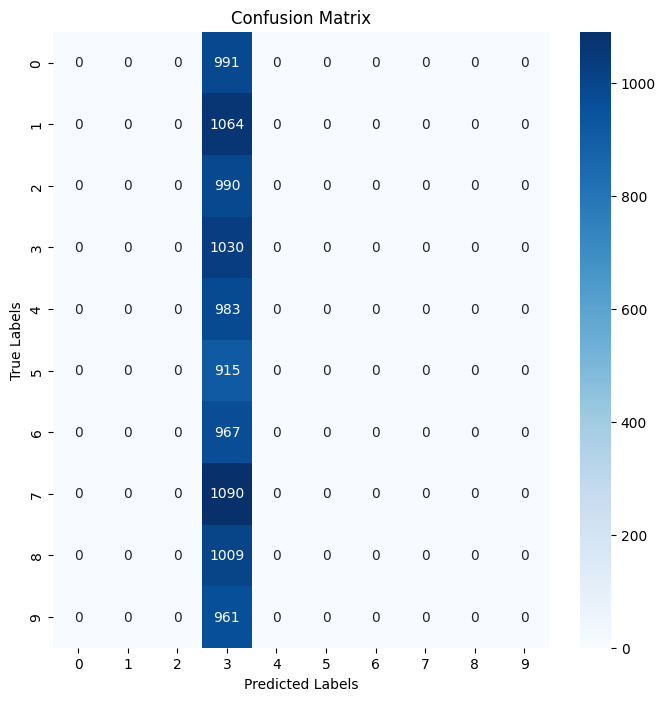

In [7]:
# Cross-Entropy Loss Function
def cross_entropy_loss_function(predictions, true_labels):
    # Applying a small epsilon to avoid log(0)
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)

    # Number of samples
    number_of_samples = predictions.shape[0]

    # Calculating the cross-entropy loss
    cross_entropy_loss = -np.sum(true_labels * np.log(predictions)) / number_of_samples
    return cross_entropy_loss

# Gradient Computation for Loss
def compute_gradient_with_respect_to_activation(predictions, true_labels):
    number_of_samples = predictions.shape[0]
    return (predictions - true_labels) / number_of_samples

# Stochastic Gradient Descent Optimizer
class StochasticGradientDescentOptimizer:
    def __init__(self, learning_rate_value):
        self.learning_rate_value = learning_rate_value

    def update_parameters(self, layer):
        # Updating weights and biases based on gradient and learning rate
        layer.weights -= self.learning_rate_value * layer.weights_gradient
        layer.biases -= self.learning_rate_value * layer.biases_gradient

# Stochastic Gradient Descent with Momentum Optimizer
class SGDWithMomentumOptimizer:
    def __init__(self, learning_rate_value, momentum_value=0.9):
        self.learning_rate_value = learning_rate_value
        self.momentum_value = momentum_value

    def update_parameters(self, layer):
        # Initialising velocity for weights and biases if not already done
        if not hasattr(layer, 'velocity_weights'):
            layer.velocity_weights = np.zeros_like(layer.weights)
            layer.velocity_biases = np.zeros_like(layer.biases)
        # Updating velocities
        layer.velocity_weights = self.momentum_value * layer.velocity_weights - self.learning_rate_value * layer.weights_gradient
        layer.velocity_biases = self.momentum_value * layer.velocity_biases - self.learning_rate_value * layer.biases_gradient
        # Updating weights and biases
        layer.weights += layer.velocity_weights
        layer.biases += layer.velocity_biases

# Function to Train the Neural Network Model
def train_neural_network_model(model, training_images, training_labels, validation_images, validation_labels, optimizer, total_epochs, batch_size_value, number_of_classes):
    training_labels_encoded = one_hot_encode_labels(training_labels, number_of_classes)
    validation_labels_encoded = one_hot_encode_labels(validation_labels, number_of_classes)
    
    training_history = {'training_loss': [], 'training_accuracy': [], 'validation_loss': [], 'validation_accuracy': []}

    for epoch in range(total_epochs):
        # Training over mini-batches
        for start_index in range(0, len(training_images), batch_size_value):
            batch_training_images = training_images[start_index:start_index + batch_size_value]
            batch_training_labels = training_labels_encoded[start_index:start_index + batch_size_value]

            # Forward pass
            predictions = model.forward_pass(batch_training_images, training_mode=True)

            # Loss calculation
            loss = cross_entropy_loss_function(predictions, batch_training_labels)

            # Backward pass
            gradient_from_loss = compute_gradient_with_respect_to_activation(predictions, batch_training_labels)
            model.backward_pass(gradient_from_loss)

            # Update parameters
            for layer in model.layers:
                if isinstance(layer, DenseLayer):
                    optimizer.update_parameters(layer)

        # Calculating training and validation metrics after each epoch
        training_loss = cross_entropy_loss_function(model.forward_pass(training_images), training_labels_encoded)
        training_accuracy = calculate_accuracy(model.forward_pass(training_images), training_labels)
        validation_loss = cross_entropy_loss_function(model.forward_pass(validation_images), validation_labels_encoded)
        validation_accuracy = calculate_accuracy(model.forward_pass(validation_images), validation_labels)

        # Storing metrics in the history dictionary
        training_history['training_loss'].append(training_loss)
        training_history['training_accuracy'].append(training_accuracy)
        training_history['validation_loss'].append(validation_loss)
        training_history['validation_accuracy'].append(validation_accuracy)

        print(f"Epoch {epoch + 1}/{total_epochs} - Training Loss: {training_loss:.4f}, Training Accuracy: {training_accuracy:.4f}, Validation Loss: {validation_loss:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

    return training_history

# Function to Calculate Accuracy
def calculate_accuracy(predictions, true_labels):
    # Argmax function converts the softmax probabilities to class labels
    predicted_labels = np.argmax(predictions, axis=1)
    # Comparing predicted labels to the true labels to find correct predictions
    correct_predictions_count = np.sum(predicted_labels == true_labels)
    # Calculating accuracy as the ratio of correct predictions to total predictions
    accuracy_value = correct_predictions_count / len(true_labels)
    return accuracy_value


    # Calculating accuracy
    accuracy = correct_predictions / true_labels.shape[0]
    return accuracy

# Function to Plot Training History
def plot_training_history(training_history):
    # Plotting training and validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(training_history['training_accuracy'], label='Training Accuracy')
    plt.plot(training_history['validation_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(training_history['training_loss'], label='Training Loss')
    plt.plot(training_history['validation_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to Plot Confusion Matrix
def plot_confusion_matrix(model, images, labels, title='Confusion Matrix'):
    # Predicting labels for the given images
    predictions = np.argmax(model.forward_pass(images), axis=1)

    # Generating a confusion matrix
    confusion_matrix_values = confusion_matrix(labels, predictions)

    # Plotting the confusion matrix as a heatmap
    plt.figure(figsize=(8, 8))
    sns.heatmap(confusion_matrix_values, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Example Usage of the Extended Features
# Splitting the training dataset into training and validation sets
split_index = 50000
validation_images, validation_labels = training_images[split_index:], training_labels[split_index:]
training_images, training_labels = training_images[:split_index], training_labels[:split_index]

# Initialising the model with a given configuration
model_configuration = [
    {'dense': (784, 128)}, {'activation': 'relu'},
    {'dense': (128, 64)}, {'activation': 'relu'},
    {'dense': (64, 10)}
]

# Creating the neural network model
neural_network_model = NeuralNetwork(model_configuration, dropout_rate=0.5)

# Training the model
optimizer = SGDWithMomentumOptimizer(learning_rate_value=0.01, momentum_value=0.9)
total_epochs = 10
batch_size_value = 64
number_of_classes = 10

training_history = train_neural_network_model(neural_network_model, training_images, training_labels, validation_images, validation_labels, optimizer, total_epochs, batch_size_value, number_of_classes)

# Plotting the training history
plot_training_history(training_history)

# Plotting the confusion matrix
plot_confusion_matrix(neural_network_model, validation_images, validation_labels)

